##  Обзор данных 

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
try:
    data = pd.read_csv('/datasets/gym_churn.csv')
except:
    data = pd.read_csv('gym_churn.csv')
# сохраняем данные в переменную

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В таблице 14cтолбцов. Тип данных в столбцах различается. Присутствует — `float`(4), `int64`(10).

Согласно документации к данным:
* `gender` — пол;
* `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
* `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `Phone` — наличие контактного телефона;
* `Age` — возраст;
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах);
* `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах)
* `Group_visits` — факт посещения групповых занятий;
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* `Churn` — факт оттока в текущем месяце;


Количество значений в столбцах не различается. 



## Исследовательский анализ данных (EDA)

In [5]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [6]:
data.groupby('Churn').agg('mean')
# вывод средних значений

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался

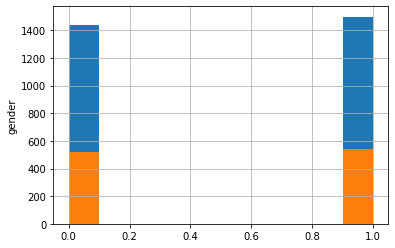

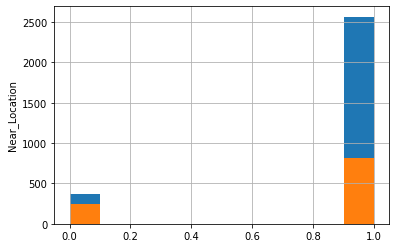

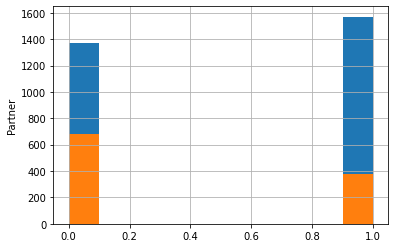

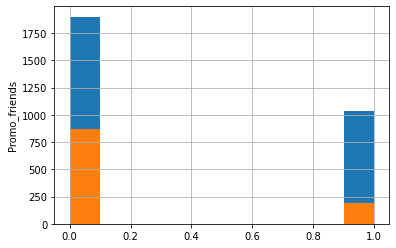

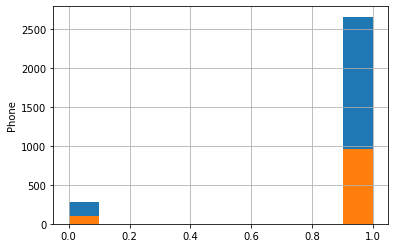

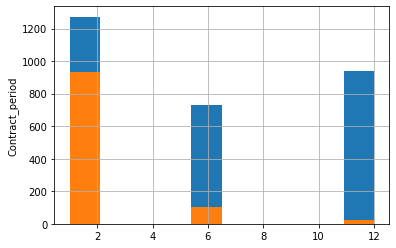

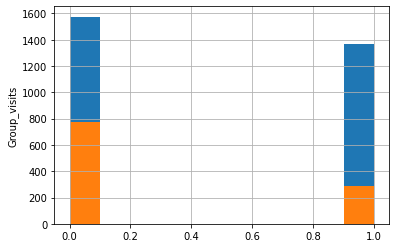

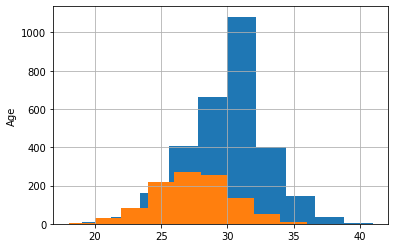

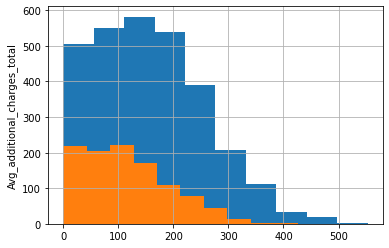

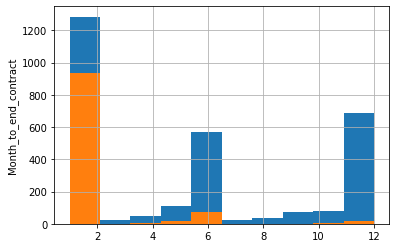

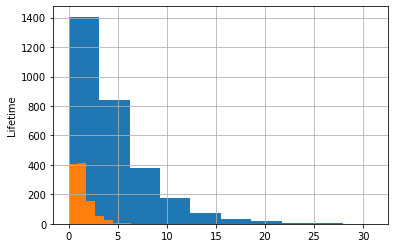

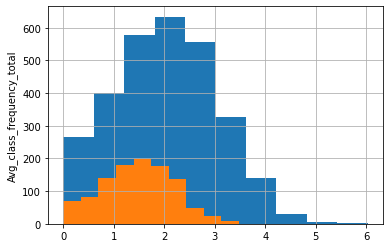

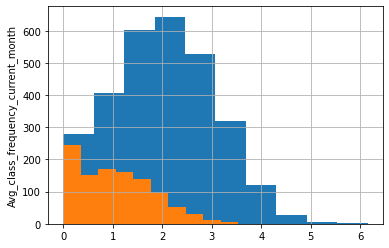

In [7]:
for a in data.drop('Churn', axis = 1).columns:
    data.query('Churn == 0')[a].hist()
    #plt.ylabel(a  + ' Churn = 0')
    #plt.show()
    data.query('Churn == 1')[a].hist()
    #plt.ylabel(a + ' Churn = 1')
    plt.ylabel(a)
    plt.show()

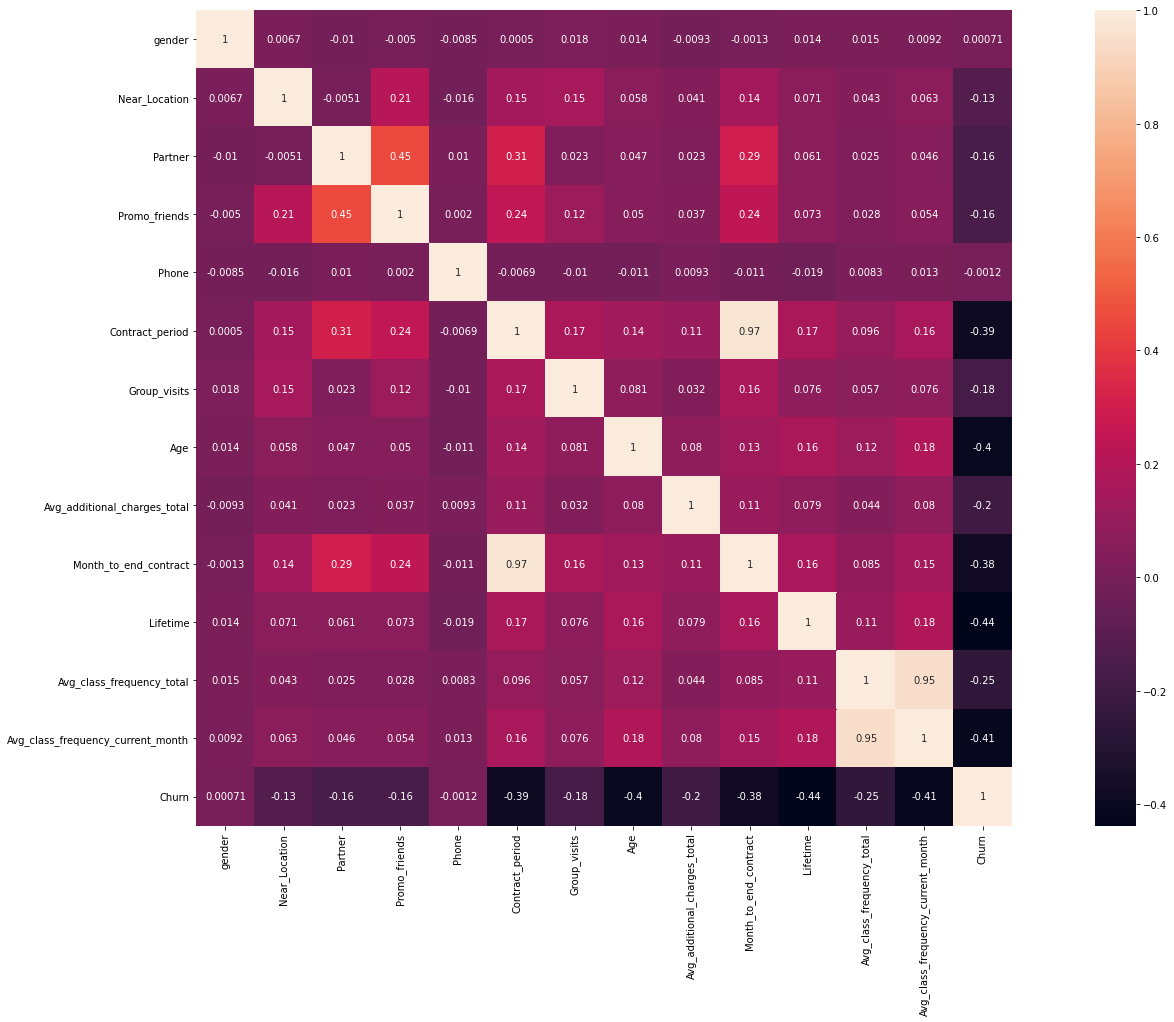

In [8]:
cm = data.corr()
plt.figure(figsize=(30,15))
sns.heatmap(cm, annot=True, square=True)
plt.show()

**Вывод**

На гистограммах и матрице корреляции видно следуюющее:
- В большинстве случаев, если клиет не проживает и не работает в районе фитнес-центра, он попадет в отток
- в отток в 1,5 раза чаще попадают клиенты, не являющиеся сотрудниками компаний-партнеров
- Клиенты, которые приходТ в рамках акции "приведи друга", поадают в отток ззначительно реже (менее 25% от числа участников акции)
- Существует прямая зависимость от длительности абонемента (чем больше срок абонемента, тем меньше вероятность, что клиент попадет в отток). Клиенты с 2х месячными абонементами попадают в отток почти в 80% случаях, в то время как у клиентво с годовым абонементом отток минимален 
- Клиенты, которые не посещают груповые тренировки попадают в отток в 50% случаев, в то время как занимающиеся в группах попадают в отток только в 25%
- В отток попадает большое колличество молодой аудитории: клиенты от 20 до 26 уходят с вероятностью почти в 100%; клинты от 26 до 30 также уходят достаточно часто (около 50%). Однако клиенты 30+ и особенно 35+ самые надежные и почти не попадают в отток
- Чем больше клиент тратит на другие услуги фитнес-центра, тем меньше вероятность, что он попадет в отток (Здесь прослеживается связь с ценой абонемента, клиенты которые меньше тратят на другие услуги фитнес-центра вероятнее всего менее платежеспосбные, поэтому с большей вероятностью попадают в отток, так как абонемент возможно им не по карману. Данную теорию также подтверждает гистограмма возраста клиентов: зачастую молодежь (до 30ти) имеет меньше финансовых возможностей, чем более взрослые клиенты)
- Клиенты , у которых до окончания действующего абонемента осталось 2 или меньше месяцев попадают в отток с вероятностью около 80% ( стоит сказать, что это связано с такой же высокой долей оттока клиентов с 2х месячным абонементом, вероятнее всего они и являются причиной такого большого процента оттока меенее чем за два месяца). Клиенты, которым осталось заниматьсся более 2х месяцев практически не попадают в отток
- Если клиент не уйдет в течение первых 5ти месяцев, то скорее всего он останется с вами до конца
- Клиенты, которые ходят в фитнес-центр 3 и более раза в неделю, вероятнее всего не попадут в отток
- Если клиент в предыдущий месяц ходил не больше 1го раза в неделю, вероятнее всего он попадет в отток

## Модель прогнозирования оттока клиентов

In [9]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [10]:
X = data.drop(columns=['Churn'])
y = data['Churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

models = [
    LogisticRegression(),
    RandomForestClassifier(n_estimators = 100)
    
]
# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'accuracy:{:.2f} precision:{:.2f} recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred)
        )
    )



In [11]:
for i in models:
    print(i)
    make_prediction(m=i, X_train=X_train_st, y_train=y_train,
                    X_test=X_test_st, y_test=y_test)
# цикл, который выводит метрики по списку моделей


LogisticRegression()
accuracy:0.92 precision:0.85 recall:0.83
RandomForestClassifier()
accuracy:0.91 precision:0.84 recall:0.79


**Вывод**
Сравнивая модели `LogisticRegression()` и `RandomForestClassifier()` по метрикам `accuracy`,  `precision`, `recall` можно сказать следующее:
- Метрики данных моделей практически идентичны, поэтому можно сказать что они обе одинаково подходят

## Кластеризация клиентов

In [12]:
X_sc = scaler.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

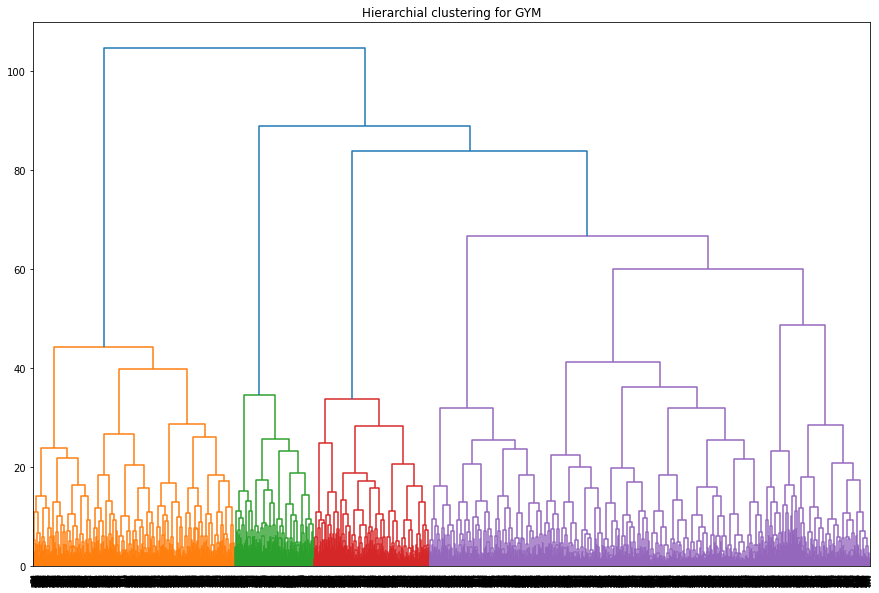

In [13]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 


In [14]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 
data['klaster'] = pd.Series(labels)
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,klaster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


### Средние значения признаков для кластеров. 

In [15]:
data.groupby('klaster').agg('mean')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
klaster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


### Распределения признаков для кластеров.

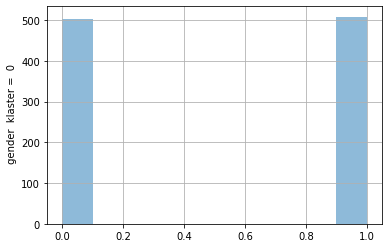

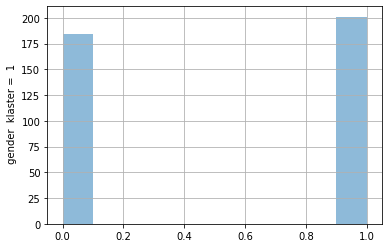

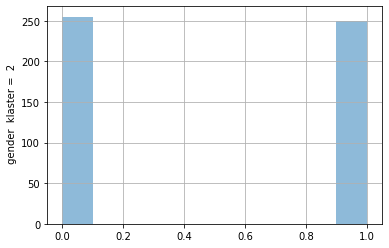

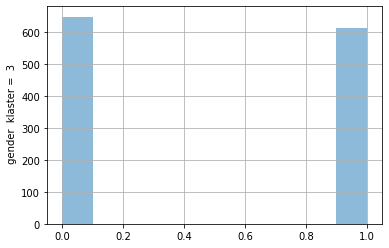

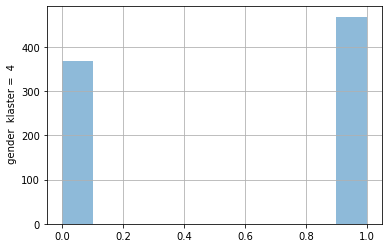

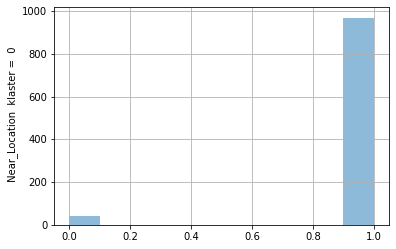

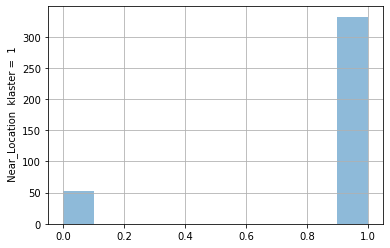

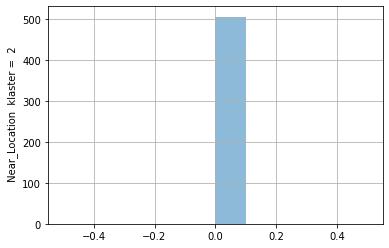

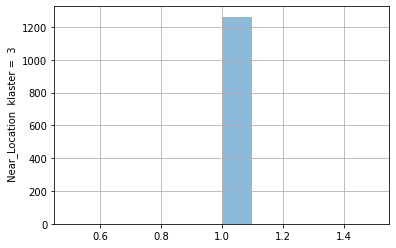

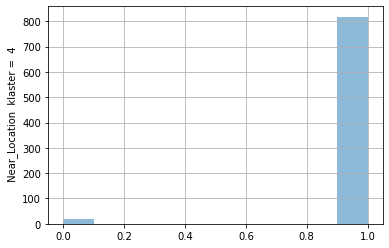

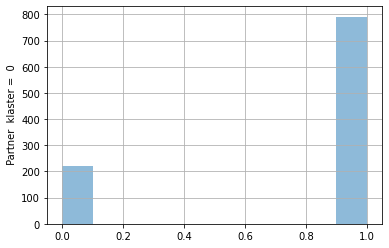

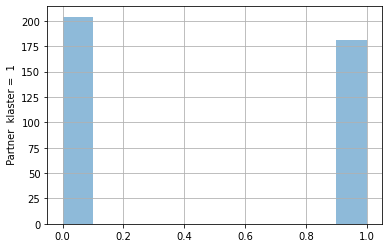

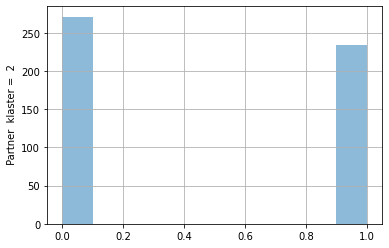

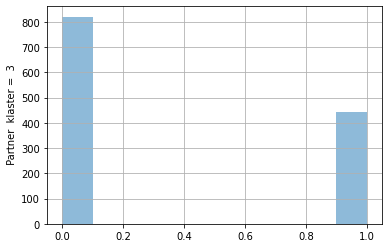

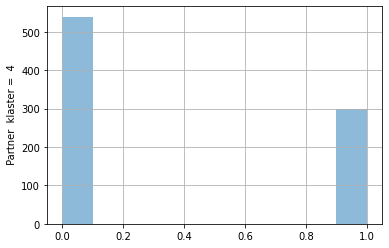

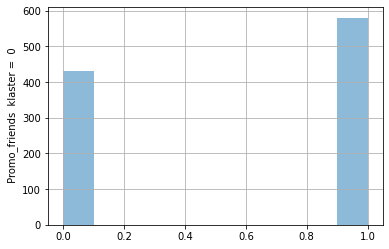

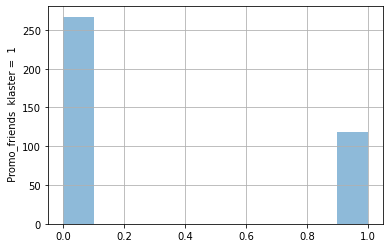

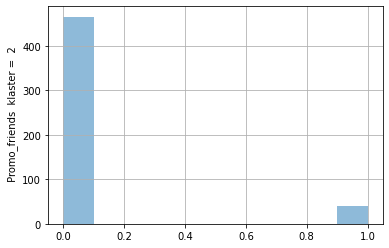

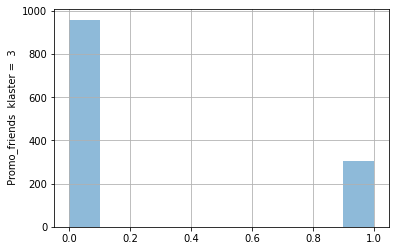

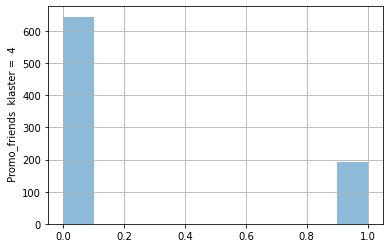

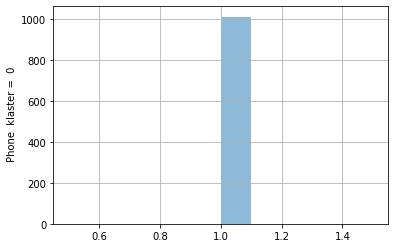

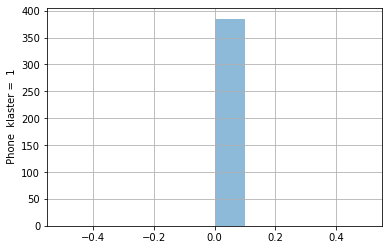

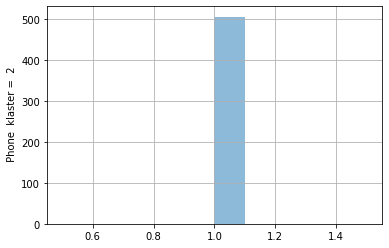

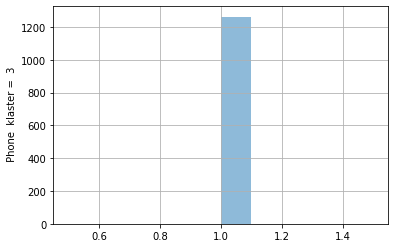

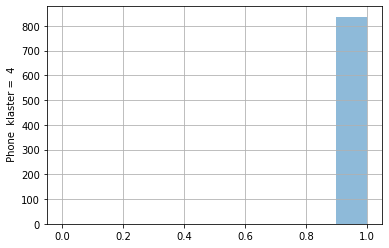

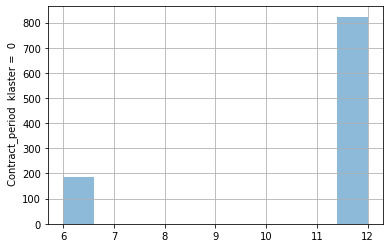

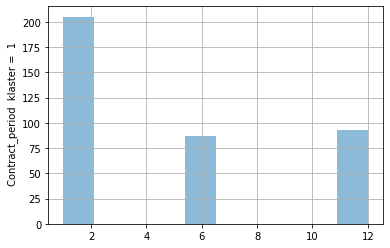

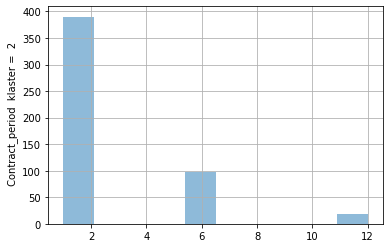

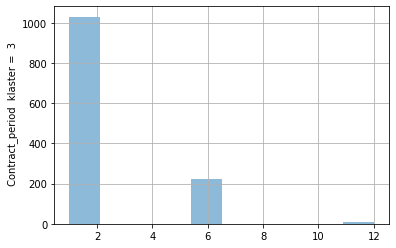

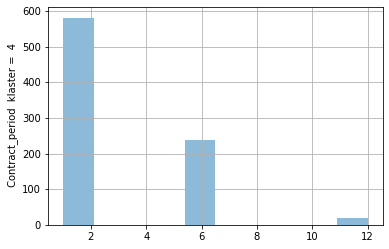

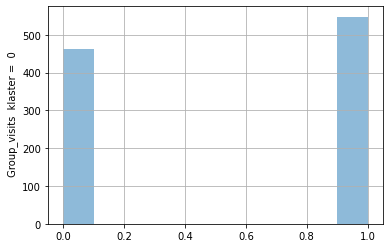

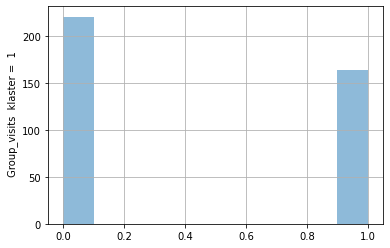

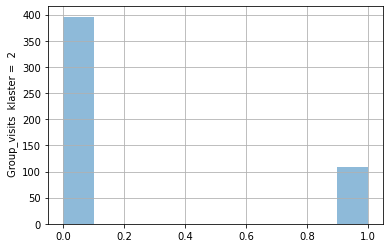

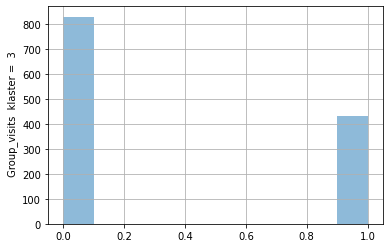

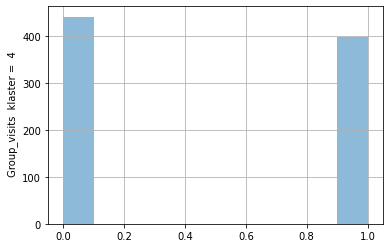

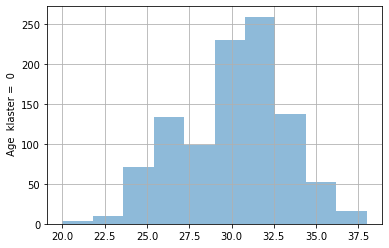

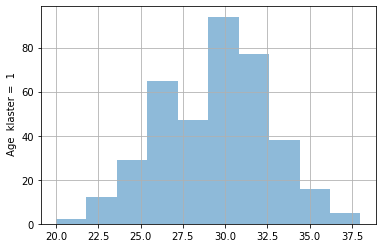

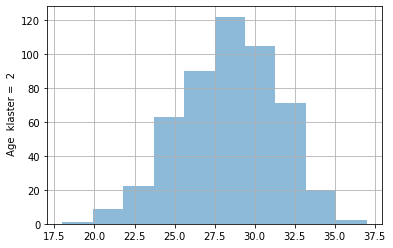

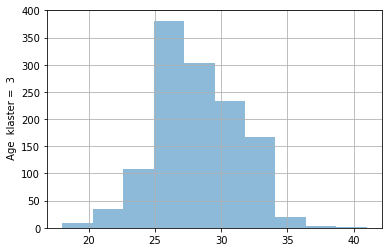

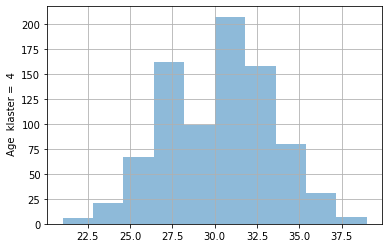

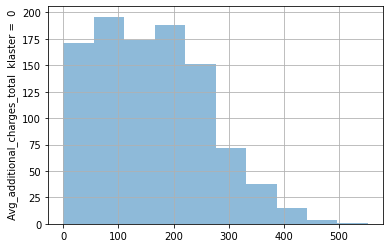

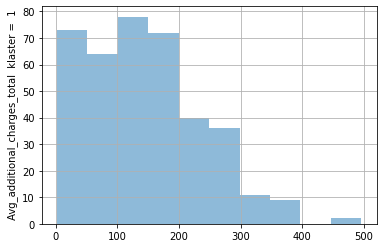

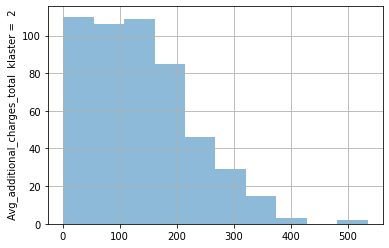

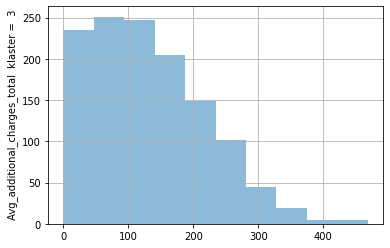

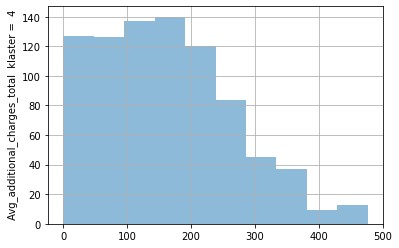

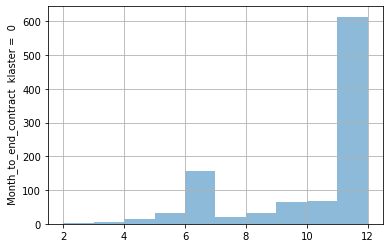

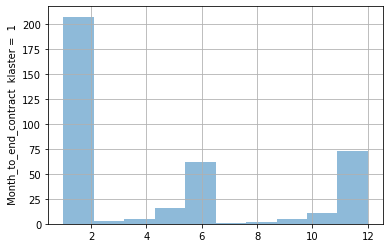

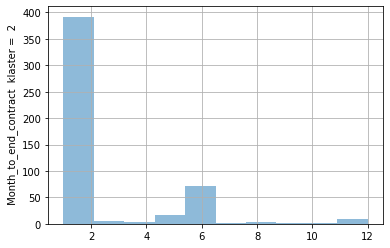

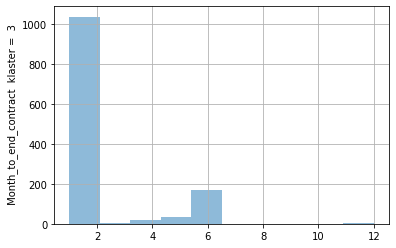

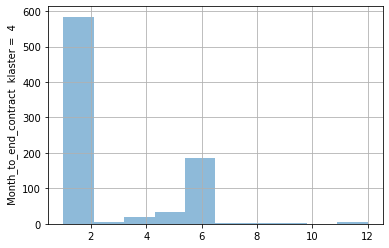

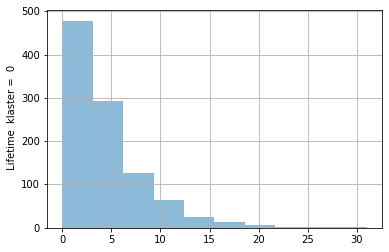

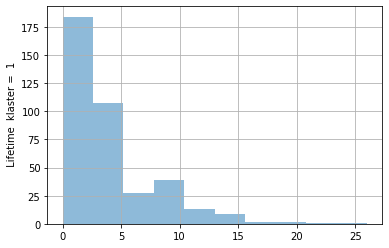

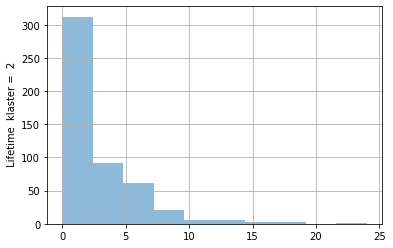

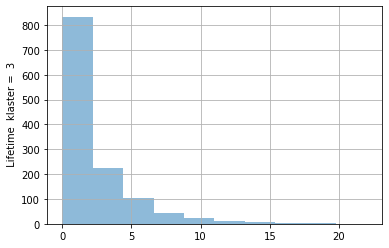

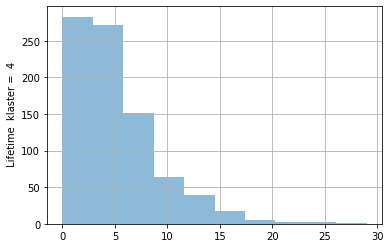

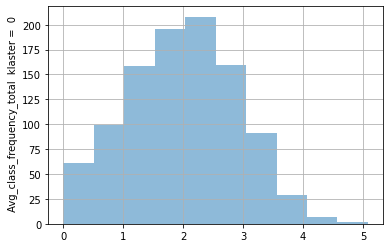

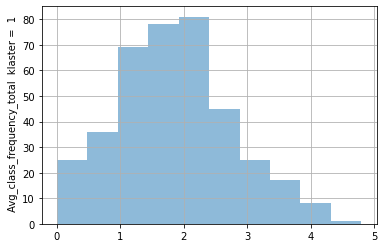

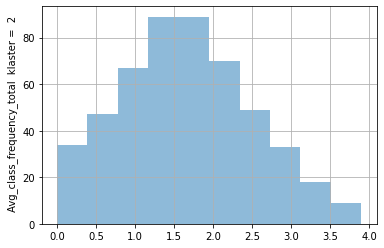

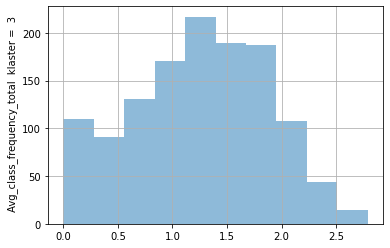

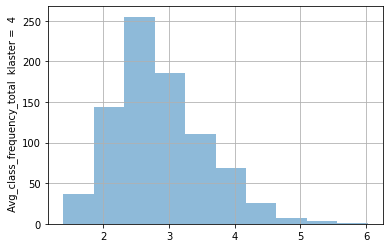

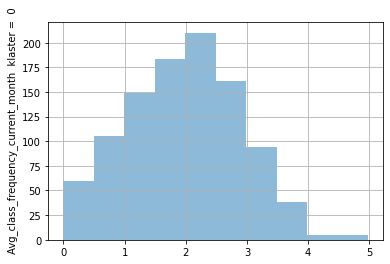

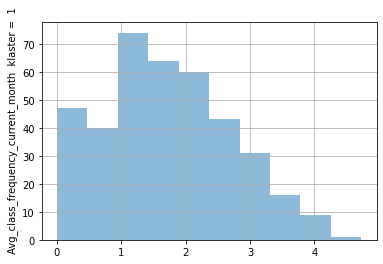

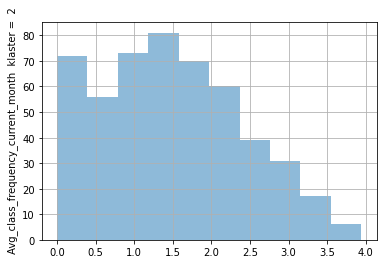

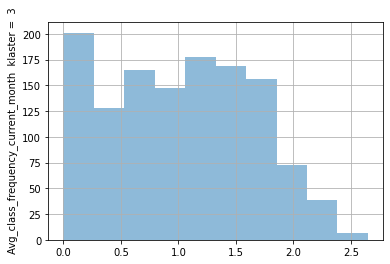

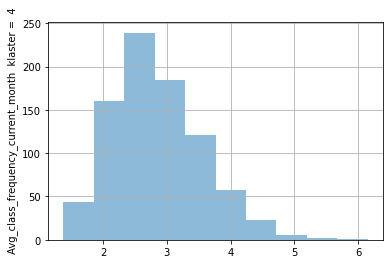

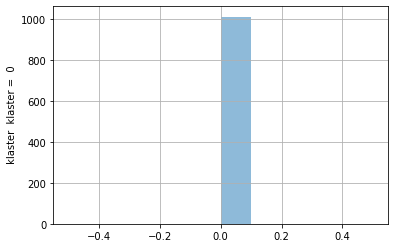

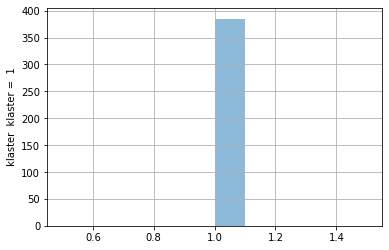

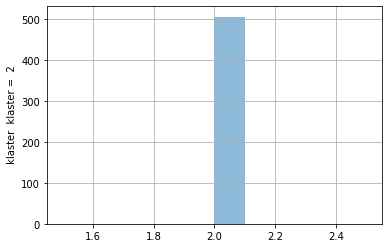

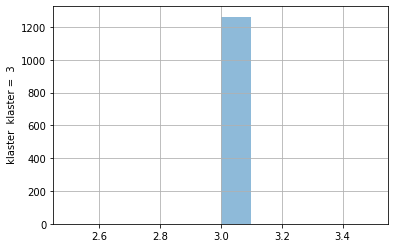

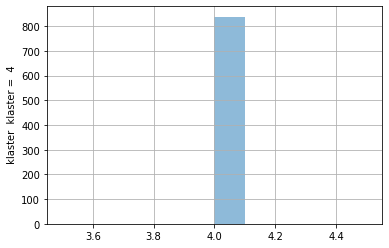

In [16]:
for a in data.drop('Churn', axis = 1).columns:
    for k in data['klaster'].sort_values().unique():
        data.query('klaster == @k')[a].hist(alpha = 0.5)
        plt.ylabel(f' {a}  klaster =  {k}') 
        plt.show()
        

**Вывод**

Сравнивая кластеры между собой, можно сказать следующее:
- Существенных отличий в кластерах по полу не наблюдается
- В кластерах 0,1,3 и 4 подавляющее большинство клиентов работают или живут в районе фитнес центра, в кластере 2 все клиенты не живут и не работают в данном районе
- В кластерах 1 и 2 клиентов от компаний-партнеров примерно столько же сколько обычных клиентов. В кластерах 3 и 4 клиентов от компаний-партнеров почти в 1,5 раза меньш, чем обычных клиентов. Особенно отличается нулевой класстер, в нем 80% клиентов являются сотрудниками-компаний
- В кластерах 1,2,3 и 4 большинство клиентов пришли не по акции "приведи друга". В нулевом же кластере около 60% пришли по акции "приведи друга"
- В кластерах 0,2,3 и 4 все клиенты оставили номер телефона. В 1м  кластере все клиенты не оставили номер телефона
- В кластерах 2,3 и 4 наибольшая чать клиентов имеют абонемент на два месяца, в 3-4 раза реже встречаются клиенты с абонементами на 6 месяцев, а абонементы на 12 месяцев почти не встречаются. В кластере 1 также лидируют клиенты с абонементами на 2 месяца, но отрыв от других абонементов уже значительно меньше, так клиентов с абонементами на 6 месяцев меньше в 2,5 раза, так же в данном кластере существенно выше доля клиентов с абонеметами на 12 месяцев (она составляет примерно 22%). Особенно отличается 0й кластер, в нем отсутсвуют клиенты с абонементами на 2 месяца, наибольшее доля в данном кластере у клиентов с абонементами на 12 месяцев (80%) и 20% у клиентов с абонементами на 6 месяцев
- В кластерах 1,2,3 и 4 большинство клиентов клиентов не посещает групповые занятия, особено велика разница во 2м кластере, в которм групповые занятия не посещают порядка 80% клиентов. От других особенно отличается нулевой кластер, так как в нем напротив более 55% клиентов посещают занятия в группах
- Возраст большинства клиентов во всех кластерах находится в районе 25-35 
- На другие услуги фитнес-центра больше всего тратят клиенты из кластеров 0 и 4. 
- Лайфтайм в кластерах 0,1,2,3 у большинства клиентов неболее 5 месяцев. Особо выделяется 4й кластер, лайфтайм его клиентов выше около 7,5 месяцев
- Средняя частота посещений в неделю за все время с начала действия абонемента в кластере 0,1,2 у большинства клиентов 1-3 раза. У кластера 3 - в большинстве случаях не превышает 2х дней. Для кластера 4 - от 2х до 4х


### Доля оттока для каждого кластера

In [17]:
data.groupby('klaster')['Churn'].agg('mean').sort_values()

klaster
0    0.027723
4    0.068019
1    0.267532
2    0.443564
3    0.514263
Name: Churn, dtype: float64

**Вывод**

- Самыми надежными являются нулевой и четвертый кластер
- К оттоку наиболее склоны 2й и 3й кластеры

## Вывод

Исследование проходило в несколько этапов:

1) Обзор данных

2) Исследовательский анализ данных (EDA)

На данном этапе :
- изучены средние значения и стандартные отклонения
- Просмотрены средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался
- Изучены столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался
- Изучены матрицы корреляций.

3) Модель прогнозирования оттока клиентов

На данном этапе:

- Разбиты данные на обучающую и валидационную выборку.
- Модель обучена двумя способами: логистической регрессией, случайным лесом.
- Сравнивая модели `LogisticRegression()` и `RandomForestClassifier()` по метрикам `accuracy`,  `precision`, `recall` можно сказать следующее: Метрики данных моделей практически идентичны, поэтому можно сказать что они обе одинаково подходят.

4) Кластеризация клиента

На данном этапе:

- Стандартизированы данные.
- Построена матрица расстояний функцией linkage() на стандартизованной матрице признаков и нарисована дендрограмма. 
- Обучена модель кластеризации на основании алгоритма K-Means и спрогнозированые кластеры клиентов.
- Изучены средние значения признаков для кластеров. 
- Изучены распределения признаков для кластеров. 
- Для каждого полученного кластера посчитана доля оттока. Самыми надежными являются нулевой и четвертый кластер. К оттоку наиболее склоны 2й и 3й кластеры.

**Рекомендации**
- Сохранить акцию "приведи друга", так как клиенты, приходящие в рамках данной акции остаются в 75% случаев, что является довольно высоким показателем
- Сделать бесплатными (если они являются платными) несколько первых групповых заняти, чтобы простимулировать клиентов записываться на групповые занятия, так как доля ушедших в отток в два раза выше у тех клиентов, которые не посещают групповые занятия
- Придумать специальные предложения и ввести льготы/скидки для молодежи, так как клиенты возрастом  от 20 до 26 уходят с вероятностью почти в 100%
- Расширять партнерстово с др. компаниями, так как клиенты, приходящие от компаний-партнеров попадают в отток в 1,5 раза реже. 
